### 1. 라이브러리 (도구) 준비

**1. 이유 (Why):** 계산기(numpy), 그래프(plt), 모델(sklearn) 등 전문가 도구를 가져옵니다.

**2. 중요 포인트 (Key Point):** LinearRegression이 우리가 쓸 '직선 긋기' 모델입니다.

**3. 주목할 점 (Focus):** 에러 없이 실행되는지 확인하세요.


기울기(coef_): [[3.05235179]]
절편(intercept_): [5.01453725]
----------------------------------------
Train MSE: 0.8997460120544851
Test MSE: 1.084623862545469
Test R^2: 0.6762536338479869


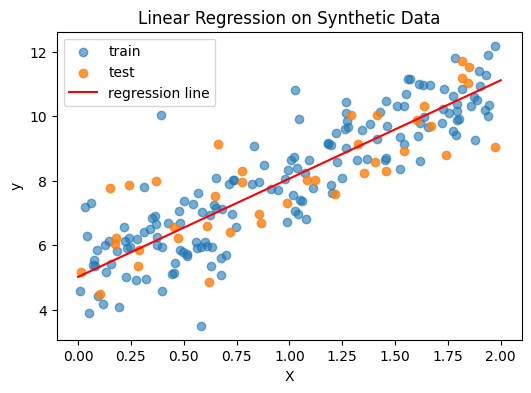

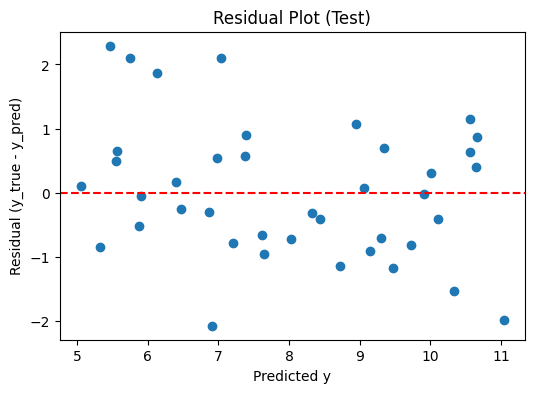

In [4]:
# Day 1 - 예제 1
# Linear Regression 기초: 인공 데이터로 회귀선과 잔차 보기

# --- 라이브러리 임포트 ---
# numpy: 수치 계산을 위한 핵심 라이브러리. 배열 처리 등에 사용.
import numpy as np
# matplotlib.pyplot: 데이터 시각화(그래프 그리기)를 위한 라이브러리.
import matplotlib.pyplot as plt
# sklearn.linear_model: 사이킷런에서 선형 회귀 모델을 가져옴.
from sklearn.linear_model import LinearRegression
# sklearn.metrics: 모델 성능 평가를 위한 지표(MSE, R^2)를 가져옴.
from sklearn.metrics import mean_squared_error, r2_score
# sklearn.model_selection: 데이터를 학습용과 테스트용으로 나누기 위한 함수.
from sklearn.model_selection import train_test_split

# --- 1. 인공 데이터 생성 ---
# 실험의 재현성을 위해 랜덤 시드(seed)를 고정.
# 이렇게 하면 코드를 실행할 때마다 항상 같은 랜덤 숫자가 생성됨.
np.random.seed(42)

# X(독립변수) 생성
# np.random.rand(200, 1): 0과 1 사이의 난수를 (200행 1열) 형태로 생성.
# 여기에 2를 곱해서 0~2 사이의 값을 가지도록 함.
# X는 공부 시간, 집 크기 등 입력 특징을 의미한다고 볼 수 있음.
X = 2 * np.random.rand(200, 1)

# noise(잡음) 생성
# np.random.randn(200, 1): 표준정규분포(평균 0, 분산 1)를 따르는 난수 생성.
# 현실 세계의 데이터에는 항상 오차나 잡음이 섞여있으므로 이를 흉내냄.
noise = np.random.randn(200, 1)

# y(종속변수, 타겟) 생성
# y = 3x + 5 + noise 식을 따르는 데이터를 만듦.
# 여기서 3은 기울기(가중치), 5는 절편(편향)을 의미.
# 모델이 학습을 통해 찾아내야 할 정답이 바로 이 관계식임.
y = 3 * X + 5 + noise

# --- 2. 데이터 분할 (Train/Test) ---
# 데이터를 학습용(Train)과 테스트용(Test)으로 80:20 비율로 나눔.
# X, y: 나눌 전체 데이터
# test_size=0.2: 전체의 20%를 테스트 데이터로 사용하겠다는 뜻.
# random_state=42: 섞는 방식을 고정하여 항상 똑같이 나누어지게 함.
# 학습용 데이터로 패턴을 배우고, 테스트 데이터로 얼마나 잘 배웠는지 검증함.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- 3. 모델 생성 및 학습 ---
# LinearRegression 객체 생성
# 이 객체가 선형 회귀 알고리즘을 담고 있음.
model = LinearRegression()

# model.fit(입력, 정답)
# 학습 데이터를 넣어 모델을 학습시킴.
# 이 과정에서 모델은 오차를 최소화하는 직선(기울기와 절편)을 찾음.
model.fit(X_train, y_train)

# 학습된 파라미터 확인
# model.coef_: 학습된 기울기 (우리가 3으로 설정했으므로 3에 가까운 값이 나와야 함)
print("기울기(coef_):", model.coef_)
# model.intercept_: 학습된 절편 (우리가 5로 설정했으므로 5에 가까운 값이 나와야 함)
print("절편(intercept_):", model.intercept_)

# --- 4. 예측 및 평가 ---
# 학습된 모델을 사용하여 예측값 생성
# 학습 데이터에 대한 예측 (잘 학습했는지 확인용)
y_train_pred = model.predict(X_train)
# 테스트 데이터에 대한 예측 (새로운 데이터에 얼마나 잘 적응하는지 확인용)
y_test_pred = model.predict(X_test)

# 성능 평가: MSE (Mean Squared Error, 평균 제곱 오차)
# 실제값(y)과 예측값(pred) 차이의 제곱 평균. 0에 가까울수록 좋음.
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# 성능 평가: R^2 Score (결정 계수)
# 모델이 데이터를 얼마나 잘 설명하는지 나타냄. 1에 가까울수록 좋음.
r2_test = r2_score(y_test, y_test_pred)

print("-" * 40)
print("Train MSE:", mse_train)
print("Test MSE:", mse_test)
print("Test R^2:", r2_test)

# --- 5. 시각화 (산점도 + 회귀선) ---
# 그래프 크기 설정 (가로 6, 세로 4)
plt.figure(figsize=(6,4))

# 학습 데이터 점 찍기 (파란색 기본값, 투명도 0.6)
plt.scatter(X_train, y_train, label="train", alpha=0.6)
# 테스트 데이터 점 찍기 (주황색 기본값, 투명도 0.8)
plt.scatter(X_test, y_test, label="test", alpha=0.8)

# 회귀선 그리기
# 0부터 2까지 100개의 점을 균등하게 생성하여 x축 좌표로 사용
# reshape(-1, 1)은 (100,) 형태의 배열을 (100, 1) 형태의 2차원 배열로 바꿈 (모델 입력 형식 맞춤)
x_line = np.linspace(0, 2, 100).reshape(-1, 1)
# 해당 x 좌표들에 대한 모델의 예측값 계산 (이게 직선이 됨)
y_line = model.predict(x_line)
# 붉은색 실선('r')으로 회귀선 그리기
plt.plot(x_line, y_line, 'r', label="regression line")

# 축 이름 및 범례 설정
plt.xlabel("X")
plt.ylabel("y")
plt.legend() # label 설정한 것들을 범례로 표시
plt.title("Linear Regression fit")
plt.show() # 그래프 출력

# --- 6. 잔차(Residual) 시각화 ---
# 잔차란? 실제값과 예측값의 차이 (오차).
# 잔차 분석을 통해 모델이 놓치고 있는 패턴이 없는지 확인.
residuals = y_test - y_test_pred

plt.figure(figsize=(6,4))
# x축: 예측값, y축: 잔차 로 산점도 그리기
plt.scatter(y_test_pred, residuals)
# y=0 인 수평선 그리기 (잔차가 0인 기준선)
# 잔차들이 이 선 주변에 무작위로 퍼져있어야 좋은 모델임.
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted y")
plt.ylabel("Residual (y_true - y_pred)")
plt.title("Residual Plot (Test)")
plt.show()


In [5]:
X

array([[0.74908024],
       [1.90142861],
       [1.46398788],
       [1.19731697],
       [0.31203728],
       [0.31198904],
       [0.11616722],
       [1.73235229],
       [1.20223002],
       [1.41614516],
       [0.04116899],
       [1.9398197 ],
       [1.66488528],
       [0.42467822],
       [0.36364993],
       [0.36680902],
       [0.60848449],
       [1.04951286],
       [0.86389004],
       [0.58245828],
       [1.22370579],
       [0.27898772],
       [0.5842893 ],
       [0.73272369],
       [0.91213997],
       [1.57035192],
       [0.39934756],
       [1.02846888],
       [1.18482914],
       [0.09290083],
       [1.2150897 ],
       [0.34104825],
       [0.13010319],
       [1.89777107],
       [1.93126407],
       [1.6167947 ],
       [0.60922754],
       [0.19534423],
       [1.36846605],
       [0.88030499],
       [0.24407647],
       [0.99035382],
       [0.06877704],
       [1.8186408 ],
       [0.51755996],
       [1.32504457],
       [0.62342215],
       [1.040

In [6]:
y

array([[ 6.56721599],
       [10.93653954],
       [ 9.68503612],
       [ 7.87759949],
       [ 7.80188635],
       [ 6.40980004],
       [ 4.15719818],
       [10.85361048],
       [ 7.6320084 ],
       [10.03552007],
       [ 6.28210254],
       [ 9.99877679],
       [10.95803197],
       [ 6.68681559],
       [ 6.91300996],
       [ 7.99722004],
       [ 6.58006534],
       [ 7.39480243],
       [ 6.70215568],
       [ 5.93156456],
       [ 8.59401566],
       [ 6.17811514],
       [ 7.02955869],
       [ 8.02535431],
       [ 7.7494218 ],
       [11.16458985],
       [ 5.93338586],
       [10.8055758 ],
       [ 9.18015476],
       [ 4.42154492],
       [ 7.57437661],
       [ 6.50561716],
       [ 5.16684677],
       [11.40731372],
       [11.26702982],
       [ 9.77755518],
       [ 5.9808889 ],
       [ 4.07118546],
       [ 8.65888321],
       [ 8.49731376],
       [ 5.94632315],
       [ 6.72532268],
       [ 5.37951205],
       [10.84123979],
       [ 5.66882245],
       [ 9